# 長期投資 vs 短期投資

「敗者のゲーム」
- 株式市場には「稲妻が輝く瞬間」があり、この瞬間に株式市場に居合わせるために長期投資が必要
- 短期トレードにおいて、この「稲妻が輝く瞬間」に居合わせることは確率的に不可能

このことをデータを見ながら確認する

### データ読み込み・加工

In [1]:
#データ読み込み
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm
import seaborn as sns
from scipy.stats import t
from scipy import stats

folder='C:\\Users\\nakam\\python\\stock-analysis\\Data\\'
os.chdir(folder)
file='FTOPIX.xlsx'
df=pd.read_excel(file)
df.head()

,日付,始値,高値,安値,終値,出来高
0,2011-07-22,860,862,857,861,114400
1,2011-07-25,859,859,853,853,45700
2,2011-07-26,856,862,854,858,99000
3,2011-07-27,853,853,847,852,151200
4,2011-07-28,840,844,838,840,199600


In [2]:
#前日の変数を追加
for i in ['始値', '高値', '安値', '終値']:
    df[i+"(前日)"]=df[i].shift(1)
df['前日比率']=df['終値']/df['終値(前日)']
df['前日比率累積']=df['前日比率'].cumprod()
df.head()

,日付,始値,高値,安値,終値,出来高,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,前日比率累積
0,2011-07-22,860,862,857,861,114400,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-07-25,859,859,853,853,45700,860.0,862.0,857.0,861.0,0.990708,0.990708
2,2011-07-26,856,862,854,858,99000,859.0,859.0,853.0,853.0,1.005862,0.996516
3,2011-07-27,853,853,847,852,151200,856.0,862.0,854.0,858.0,0.993007,0.989547
4,2011-07-28,840,844,838,840,199600,853.0,853.0,847.0,852.0,0.985915,0.975610


In [3]:
del df['出来高']
df.head()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,前日比率累積
0,2011-07-22,860,862,857,861,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-07-25,859,859,853,853,860.0,862.0,857.0,861.0,0.990708,0.990708
2,2011-07-26,856,862,854,858,859.0,859.0,853.0,853.0,1.005862,0.996516
3,2011-07-27,853,853,847,852,856.0,862.0,854.0,858.0,0.993007,0.989547
4,2011-07-28,840,844,838,840,853.0,853.0,847.0,852.0,0.985915,0.975610


### 時系列データの確認

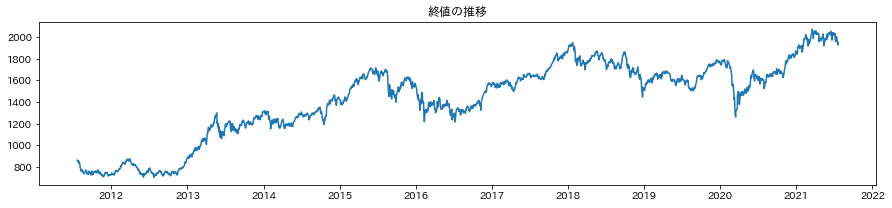

In [4]:
plt.figure(figsize=(15,3))
plt.plot(df['日付'],df['終値'])
plt.title('終値の推移')
plt.show()

### 最も良い5日を逃すとどうなるか検証

In [5]:
#ベスト5の時の前日比率を1倍に変更
df1=df.sort_values(by='前日比率',ascending=False)
df2=df1.iloc[:5,[0,9,10]].copy()
df1.iloc[:5,9]=1
df1.head(5)

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,前日比率累積
1119,2016-02-15,1275,1323,1269,1312,1241.0,1247.0,1213.0,1217.0,1.0,1.523810
2122,2020-03-25,1427,1463,1419,1463,1358.0,1372.0,1343.0,1369.0,1.0,1.699187
1017,2015-09-09,1477,1518,1470,1514,1457.0,1462.0,1425.0,1427.0,1.0,1.758420
1104,2016-01-22,1369,1399,1356,1397,1362.0,1383.0,1322.0,1323.0,1.0,1.622532
1301,2016-11-10,1404,1405,1382,1396,1392.0,1400.0,1306.0,1323.0,1.0,1.621370


In [6]:
df1=df1.sort_values(by='日付')
df1.head()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,前日比率累積
0,2011-07-22,860,862,857,861,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-07-25,859,859,853,853,860.0,862.0,857.0,861.0,0.990708,0.990708
2,2011-07-26,856,862,854,858,859.0,859.0,853.0,853.0,1.005862,0.996516
3,2011-07-27,853,853,847,852,856.0,862.0,854.0,858.0,0.993007,0.989547
4,2011-07-28,840,844,838,840,853.0,853.0,847.0,852.0,0.985915,0.975610


In [7]:
#ベストな5日を逃した場合
df1['前日比率累積']=df1['前日比率'].cumprod()
df1.tail()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,前日比率累積
2442,2021-07-15,2000,2000,1976,1978,1996.0,2010.0,1994.0,2004.0,0.987026,1.686844
2443,2021-07-16,1970,1982,1965,1973,2000.0,2000.0,1976.0,1978.0,0.997472,1.682580
2444,2021-07-19,1952,1956,1939,1945,1970.0,1982.0,1965.0,1973.0,0.985808,1.658702
2445,2021-07-20,1926,1935,1922,1926,1952.0,1956.0,1939.0,1945.0,0.990231,1.642498
2446,2021-07-21,1956,1965,1938,1944,1926.0,1935.0,1922.0,1926.0,1.009346,1.657849


In [8]:
#元データ
df.tail()

,日付,始値,高値,安値,終値,始値(前日),高値(前日),安値(前日),終値(前日),前日比率,前日比率累積
2442,2021-07-15,2000,2000,1976,1978,1996.0,2010.0,1994.0,2004.0,0.987026,2.297329
2443,2021-07-16,1970,1982,1965,1973,2000.0,2000.0,1976.0,1978.0,0.997472,2.291521
2444,2021-07-19,1952,1956,1939,1945,1970.0,1982.0,1965.0,1973.0,0.985808,2.259001
2445,2021-07-20,1926,1935,1922,1926,1952.0,1956.0,1939.0,1945.0,0.990231,2.236934
2446,2021-07-21,1956,1965,1938,1944,1926.0,1935.0,1922.0,1926.0,1.009346,2.257840


- 2447日中のもっともよい5日を逃すだけで、リターンが2.26倍から1.66倍に下がることが分かった

### グラフの確認

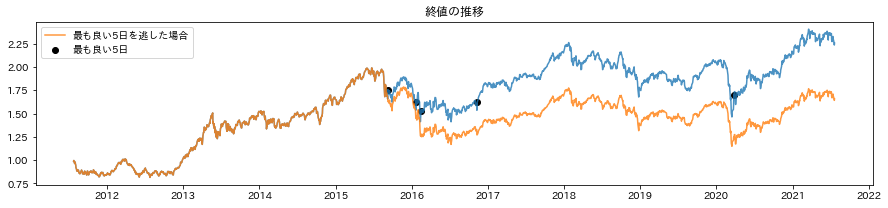

In [9]:
plt.figure(figsize=(15,3))

plt.plot(df['日付'],df['前日比率累積'],alpha=0.8)
plt.plot(df['日付'],df1['前日比率累積'],label='最も良い5日を逃した場合',alpha=0.8)
plt.scatter(df2['日付'],df2['前日比率累積'],c='black',label='最も良い5日')

plt.title('終値の推移')
plt.legend()
plt.show()

- 「稲妻が輝く瞬間」は暴落の後にくる傾向がある
- 暴落時にパニックになり手放すと「稲妻が輝く瞬間」を逃してしまう